Main reference here - https://pytorch.org/tutorials/beginner/data_loading_tutorial.html

In [2]:
import os
import torch
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

In [3]:
plt.ion()

In [4]:
dataset_root = "/Users/shawon/Codes/Python/V6"
dataset_path = os.path.join(dataset_root, "train")

In [11]:
# load all image names and their labels
dataset_info = [] # (label, file_name) tuple

In [9]:
class_labels = os.listdir(dataset_path)
class_labels.pop(class_labels.index('.DS_Store'))
class_labels

['fresh_mango',
 'rotten_mango',
 'fresh_apple',
 'fresh_banana',
 'rotten_apple',
 'rotten_orange',
 'rotten_banana',
 'fresh_orange']

In [12]:
for label in class_labels:
    p = os.path.join(dataset_path, label)
    images = os.listdir(p)

    for img in images:
        dataset_info.append((label, os.path.join(p, img)))

In [18]:
# a function to show an image

def show_image(image_path):
    plt.imshow(io.imread(image_path))
    plt.show()

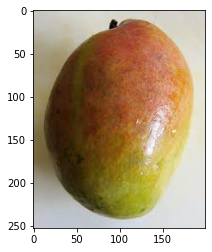

In [19]:
show_image(dataset_info[0][1])

In [20]:
# create torch dataset
class FruitImageDataset(Dataset):
    def __init__(self, dataset_info, transform=None):
        self.dataset_info = dataset_info
        self.transform = transform

    def __len__(self):
        return len(self.dataset_info)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        label = self.dataset_info[idx][0]
        img_file_name = self.dataset_info[idx][1]

        image = io.imread(img_file_name)

        sample = { "label": label, "image": image }

        if self.transform:
            sample = self.transform(sample)

        return sample